# Assignment 0 - Advances in Data Mining

## Authors

- Filipe Coutinho, s3801454
- Pelagia Kalpakidou, s3744825
- Myriana Miltiadous, s3699463

## Problem Analysis

Considering the scenario where we have $n$ coins and $N$ buckets, and we throw the coins one by one.

The chance of the first coin hitting bucket $k$ is $\frac{1}{N}$.

Thus, the change of this first coin **not** hitting a bucket is: 
$$1 - \frac{1}{N} = \frac{(N - 1)}{N}$$

Continuing with the same way of thinking, the change of the second coin **not** hitting a bucket is: 
$$\left(\frac{N-1}{N}\right)^{2} = \left( 1 - \frac{1}{N} \right)^{2}$$


So, the probability of a bucket staying empty after $n$ throws is:
$$\left(\frac{N-1}{N}\right)^{n} = \left( 1 - \frac{1}{N} \right)^{n}$$

However, for our problem space, we want the probability of our "bucket" not being empty after $n$ random values are picked. Therefore, the probability is:
$$1 - \left(1 - \frac{1}{N}\right)^{n}$$

Furthermore, we can leverage the limit properties of $e$:
$$\lim_{x\to\infty} \left(1 - \frac{1}{x}\right) = \frac{1}{e}$$

Applying this property to our probability equation, we get a new probability equation:
$$
\lim_{N\to\infty} 1 - \left(1 - \frac{1}{N}\right)^{n} = 1 - \lim_{N\to\infty} \left(1 - \frac{1}{N}\right)^{n} = 1 - \lim_{N\to\infty} \left(\left(1 - \frac{1}{N}\right)^{N}\right)^{\frac{n}{N}} = 1 - \left(\frac{1}{e}\right)^{\frac{n}{N}} = 1 - e^{-\frac{n}{N}}
$$

As $\frac{1}{N}$ gets small (i.e N goes to infinity), we can use the approximation above, concluding that:
$$P_{distinct\_value}\approx 1 - e^{-\frac{n}{N}}$$

The number of distinct values is then approximately:
$$N \left(1 - \left(1 - \frac{1}{N}\right)^{n}\right) \approx N\left(1 - e^{-\frac{n}{N}}\right)$$


## Experimental Implementation

In this notebook the goal is to apply the above derived formula of distinct numbers approximation and compare it with the real value of distinct values as $n$ and $N$ changes. In that case $n$ which before was set to be the number of coins, is going to be the number of randomly generated numbers using the `np.random.randint()` function of numpy library and $N$ is going to be the $[1,Ν]$ interval from which the values are going to be randomly generated.

### Import Libraries

Firstly, we imported the necessary libraries to do our experiments. We used the libraries: *numpy* and *pandas* to handle our data and *matplotlib* for visualizations that help us draw our conclusions. We set the random seed to be 3699463 which is one of our student numbers, even though we also experimented with the others and end up to similar conclusions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

np.random.seed(3699463)
#np.random.seed(3744825)
#np.random.seed(3801454)

### Necessary functions

The first function we created named `distinct_values(n, N, k=1)` takes as input:

- The value of $n$

- The value of $N$

- The value of k, which represents how many times the n numbers are going to be generated. We put k=1 as the default value in case that no k is given when the function is called.

We chose to have the k in order for our results to be more accurate because of the randomness.
The function calculates the number of distinct values for each time that the numbers are generated and puts them in a list with length k. At the end it returns the mean of that k-D vector. 

In [3]:
def distinct_values(n, N, k=1):
    """
    This function expresses the actual number of distinct values in a random sequence of n integers between 1 and N

    :param n: Number of values in a list
    :param N: Maximum for each value of list
    :param k: Define the number of generation of sequences, to get a mean value
    :return: Return the actual number of distinct values
    """

    distinct_values = [len(set(np.random.randint(1, N + 1, size=(n)).tolist())) for _ in range(k)]
    return np.mean(distinct_values)

The second function we created named `expected_distinct_values(n, N)` takes as input the values of $n$ and $N$ and calculates and returns the expected number of distinct values according to the formula we calculated and explained in the first section of this notebook, [Problem Analysis](#problem-analysis). 

In [4]:
def expected_distinct_values(n, N):
    """
    This function expresses the expected number of distinct values in a random sequence of n integers between 1 and N, using the derived formula

    :param n: Number of values in a list
    :param N: Maximum for each value of list
    :return: Return the expected number of distinct values
    """

    return N * (1 - (1 - 1/N)**n)

The third function named `draw_heatmap(df, x_label, y_label, z_label, title, colorbar_label)` takes as input a dataframe and 5 strings for the labels of the x, y, z-axis,colorbar and title and creates a heatmap.

In [5]:
def draw_heatmap(df, x_label, y_label, z_label, title, colorbar_label):
    """
    Utility function to draw heatmap of result data
    """
    heatmap_data = df.pivot(index=y_label, columns=x_label, values=z_label)

    unique_x_labels = df[x_label].unique()
    unique_y_labels = df[y_label].unique()
    
    
    plt.figure(figsize=(8, 6))

    plt.imshow(heatmap_data, cmap='viridis', origin='lower') 
    plt.colorbar(label=colorbar_label)

    plt.xticks(np.arange(len(unique_x_labels)), unique_x_labels, rotation=45, ha="right")

    plt.yticks(np.arange(len(unique_y_labels)), unique_y_labels)

    plt.xlabel('N values')
    plt.ylabel('n values')

    plt.title(title)

    plt.show()

We chose to experiment with all the combination of values of $n$ and $N$ in the following vector `[10,100,1000,10000,100000]` and call the function `distinct_values(n,N,k)`, 1000 times. We considered 1000 as a good number for our results to be accurate and reproducible with any combination of $n$ and $N$. 

The iteration is done using two for loops between all the combinations of $n$ and $N$ and each time after calling the functions `expected_distinct_values(n, N)` and `distinct_values(n, N, k)` we calculated the error between actual distinct values (mean after generating 1000 times the n numbers) and expected distinct values (Formula result). 

Additionally, a dataframe is created with the following columns : 'n', 'N', 'Expected Distinct Value', 'Actual Distinct Values', 'Error Percentage', in order to summarize our results.

In [6]:
# List of different values for n and N to experiment
n_values = [10 ** i for i in range(1, 5)]
N_values = [10 ** i for i in range(1, 5)]

# Number of generations of distinct values
k = 1000

result_data = []

for n in n_values:
    for N in N_values:
        no_expected_distinct_values = expected_distinct_values(n, N)
        no_distinct_values = distinct_values(n, N,k)

        # Calculate error between average actual distinct values and expected distinct values (Formula result)
        err = abs((no_expected_distinct_values - no_distinct_values)/no_distinct_values * 100)

        # Update result data
        data = [n, N, no_expected_distinct_values, no_distinct_values, err]
        result_data.append(data)

result_data = np.array(result_data)

In [7]:
result_data_df = pd.DataFrame(result_data, columns=['n', 'N', 'Expected Distinct Value', 'Average Actual Distinct Values', 'Error Percentage'])
result_data_df

,n,N,Expected Distinct Value,Average Actual Distinct Values,Error Percentage
0,10.0,10.0,6.513216,6.513,0.003310
1,10.0,100.0,9.561792,9.566,0.043984
2,10.0,1000.0,9.955120,9.965,0.099149
3,10.0,10000.0,9.995501,9.994,0.015021
4,100.0,10.0,9.999734,10.000,0.002656
5,100.0,100.0,63.396766,63.384,0.020141
6,100.0,1000.0,95.207853,95.171,0.038723
7,100.0,10000.0,99.506613,99.504,0.002626
8,1000.0,10.0,10.000000,10.000,0.000000
9,1000.0,100.0,99.995683,99.996,0.000317


After calling the `draw_heatmap(df, x_label, y_label, z_label, title, colorbar_label)` function we created a heatmap, which compares the percentage error between actual distinct values and expected distinct values which is in the datatframe mentioned above ,for all the different combinations of $n$ and $N$.

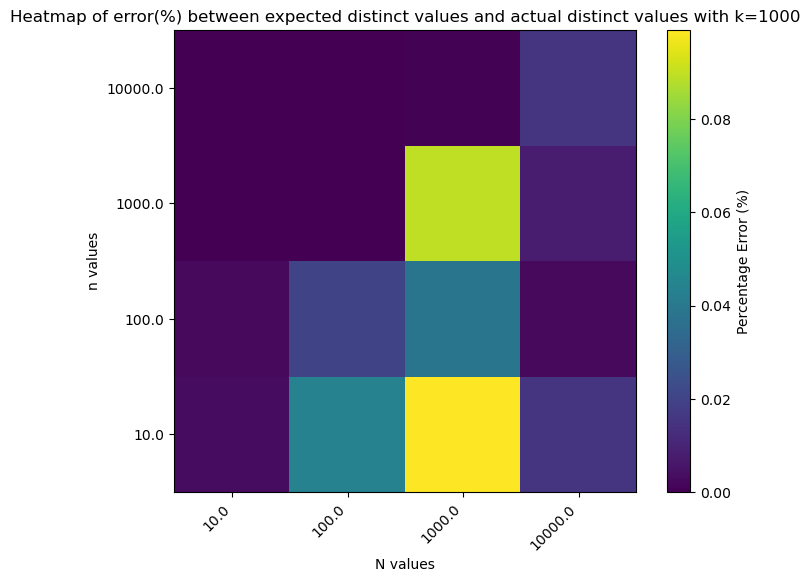

In [8]:
draw_heatmap(result_data_df, 'N', 'n', 'Error Percentage', 
             f'Heatmap of error(%) between expected distinct values and actual distinct values with k={k}',
             'Percentage Error (%)')

### Comments on heatmap: 

Sample size($n$) impact: From the above heatmap it is obvious that the experimental values start to converge towards the expected values indicated by the formula, as the sample size $n$ increases compared to the value of $N$ (i.e bigger value of $\frac{n}{N}$ fraction).  This demonstrates that the number of distinct values becomes more predictable and closer to the expected value as we generate more random numbers. This is consistent with all the random seeds we tried.

When $n$ and $N$ are equal we did not observed any specific pattern as they increase. The percentage error between the formula and the actual number of distinct values does not follow a specific trend. It can be either bigger or smaller. However, with some other random seeds we observed that as they were both increasing the error was decreasing but since this does not apply for all the cases we can not make any generalization.

Impact of Range ($N$): It applies for all the values of $N$ that when $n > N$ the prediction of the formula is better, since the error is smaller. This is something that all the random seeds we tried had in common. We can also observe that for $N=10$ and $N=1000$, which are the smallest and largest values respectively that we experimented with, seems that the formula predicts better the number of distinct values for all the values of $n$. 

### Formula with Euler constant

We also created a function that computes the expected value of distinct values using the euler constant for comparison reasons. We know from the theory that as $N$ gets bigger the formula with the euler constant will get closer to the one without the euler constant and therefore will be closer to the results we had before for bigger $N$. We also expect that for smaller values of $N$ and $n$ the formula with Euler constant will be less accurate than the one without.

In [9]:
def expected_distinct_values_with_euler(n, N):
    return N * (1 - (np.exp(1)**(-n/N)))

In [10]:
euler_distinct_values = []
error_percentages = []

for i in result_data_df.index:
    n = result_data_df['n'][i]
    N = result_data_df['N'][i]

    no_euler_expected_distinct_values = expected_distinct_values_with_euler(n, N)
    no_distinct_values = result_data_df['Average Actual Distinct Values'][i]

    no_expected_distinct_values = expected_distinct_values(n, N)
    
    
    # Calculate difference between average actual distinct values and expected distinct values with euler formula
    err = abs((no_euler_expected_distinct_values - no_distinct_values)/no_distinct_values * 100)


    euler_distinct_values.append(no_euler_expected_distinct_values)
    error_percentages.append(err)


# Append columns to result data
result_data_df['Euler Expected Distinct Values'] = euler_distinct_values
result_data_df['Error percentage with Euler constant formula'] = error_percentages


result_data_df

,n,N,Expected Distinct Value,Average Actual Distinct Values,Error Percentage,Euler Expected Distinct Values,Error percentage with Euler constant formula
0,10.0,10.0,6.513216,6.513,0.003310,6.321206,2.944794
1,10.0,100.0,9.561792,9.566,0.043984,9.516258,0.519985
2,10.0,1000.0,9.955120,9.965,0.099149,9.950166,0.148858
3,10.0,10000.0,9.995501,9.994,0.015021,9.995002,0.010023
4,100.0,10.0,9.999734,10.000,0.002656,9.999546,0.004540
5,100.0,100.0,63.396766,63.384,0.020141,63.212056,0.271274
6,100.0,1000.0,95.207853,95.171,0.038723,95.162582,0.008845
7,100.0,10000.0,99.506613,99.504,0.002626,99.501663,0.002349
8,1000.0,10.0,10.000000,10.000,0.000000,10.000000,0.000000
9,1000.0,100.0,99.995683,99.996,0.000317,99.995460,0.000540


And we again used the function `draw_heatmap()` to compare the formula with euler constant with the Average Actual Distinct Values.

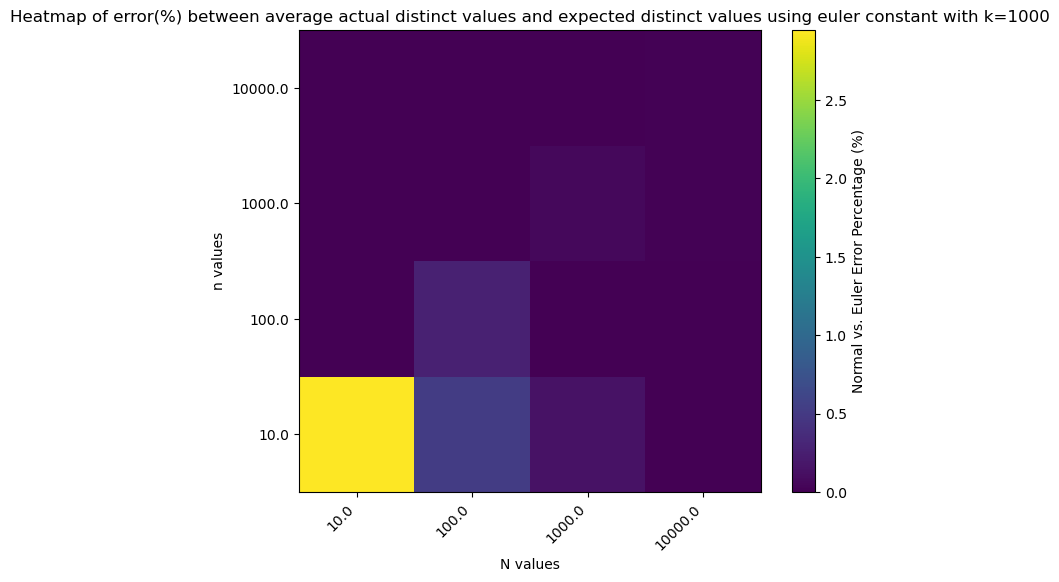

In [11]:
draw_heatmap(
    result_data_df, 'N', 
    'n', 'Error percentage with Euler constant formula',  
    f'Heatmap of error(%) between average actual distinct values and expected distinct values using euler constant with k={k}', 
    "Normal vs. Euler Error Percentage (%)")

### Comments on heatmap:

We can indeed observe that for smaller values of $n$ and $N$ the percentage error is bigger and close to 2.5%, whereas in the previous heatmap we created the biggest error percentage we had was 0.1%, even for the smallest values of $n$ and $N$.
 
Generally, again with that formula the predicted accuracy is better when $n$ is bigger than $N$.

Additionally in this heatmap the percentage error decreases steadily as the $N$ and $n$ increase, when they are equal. 
Finally, it also decreases steadily as $N$ increases. 

## Conclusions

In summary, our analysis focuses on predicting the distinct values obtained from the generation of $n$ random integers within the range of 1 to $N$. To achieve this, we have employed two formulas: one derived in the first section of this notebook titled [Problem Analysis](#problem-analysis), and the other integrating Euler's constant. 

Based on the percentage errors displayed on the heatmaps, we conclude that for smaller $n$ and $N$ values, the Euler constant formula exhibits reduced accuracy compared to the derived formula, $$N\left(1 - \left(1 - \frac{1}{N}\right)^{n}\right)$$

This highlighted sensitivity to sample size and range of the formula with Euler's constant. Notably, as the ratio of sample size $n$ to range $N$ increases, the experimental results correspond most closely to predictions from the derived formula, illustrating the significance of higher sample sizes for accurate predictions. As a different approach, the formula with Euler's constant demonstrates that as the range $N$ widens, its accuracy comes close to being as the derived formula's. 

Conversely, when $n = N$, no notable trend in percentage error emerges in the derived formula, which is not in line with the results of the formula with Euler's constant. Interestingly, the Euler constant formula is less accurate than the derived formula for smaller values of $n$ and $N$ but displayed some degree of consistency in decreasing percentage error as both increase equivalently.

Overall, our experiments were consistent with our respective formulas, highlighting the importance of sample size and range. The derived formula proved robust, especially with larger samples, while the Euler constant formula is weaker when $n$ and $N$ are small, making it important to consider specific conditions when applying these formulas for predictions.